<center>
    <h1>ETH Zurich DBIOL CAL Application</h1>
    <h2>Interactive Graphics in Python</h2>
    <h3>Jupyter Notebook Examples</h3>
    <h3>Genetic and Metabolite Visualization</h3>
    <h4>Andrea Ferreira</h4>
    <h5>August 2024</h5>
</center>


## Introduction

In this notebook, I will demonstrate simulations related to the findings of a genome-wide association study (GWAS) that investigates metabolic traits. The paper, titled Genome-Wide Association Study of Metabolic Traits Reveals Novel Gene-Metabolite-Disease Links, explores how certain genetic variations are linked to metabolic traits and their potential implications for diseases. The study, conducted by Rueedi et al. (2014), provides insights into novel gene-metabolite associations and their possible role in disease progression. (more at [PLOS Genetics](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1004132#s4))

### Example 1 - matplotlib and ipywidgets

The code below demonstrates an **interactive visualization** that simulates the relationship between Single Nucleotide Polymorphisms (SNPs) and metabolite concentrations using fictional data. The code utilizes Python libraries such as numpy for data simulation, **matplotlib** for plotting, and **ipywidgets** for creating an interactive user interface. 

The user can select different SNPs and metabolites from dropdown menus to explore how variations in genotypes might correlate with metabolite concentrations.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Data simulation: Hypothetical data for SNPs and metabolite concentrations
snp_data = {
    'rs492602': np.random.normal(loc=0.5, scale=0.1, size=100),
    'rs8101881': np.random.normal(loc=0.7, scale=0.1, size=100)
}

metabolite_data = {
    'Fucose': np.random.normal(loc=100, scale=10, size=100),
    'Lysine': np.random.normal(loc=150, scale=15, size=100)
}

# Function to plot the data
def plot_interactive(snp, metabolite):
    plt.figure(figsize=(10, 6))
    plt.scatter(snp_data[snp], metabolite_data[metabolite], alpha=0.6, c='blue')
    plt.title(f'Relationship between {snp} and {metabolite}')
    plt.xlabel(f'Genotype {snp}')
    plt.ylabel(f'Concentration of {metabolite}')
    plt.grid(True)
    plt.show()

# Creating the interactive widget
interact(
    plot_interactive,
    snp=widgets.Dropdown(
        options=snp_data.keys(),
        value='rs492602',
        description='SNP:',
    ),
    metabolite=widgets.Dropdown(
        options=metabolite_data.keys(),
        value='Fucose',
        description='Metabolite:',
    )
)


interactive(children=(Dropdown(description='SNP:', options=('rs492602', 'rs8101881'), value='rs492602'), Dropd…

<function __main__.plot_interactive(snp, metabolite)>

### Example 2 - matplotlib and ipywidgets

In this second example, the code simulates how different Single Nucleotide Polymorphisms (SNPs) might affect the concentration of specific metabolites using fictional data. This example allows users to interactively explore the effects of two SNPs, *rs492602* and *rs8101881*, on the concentrations of *Fucose* and *Lysine*, respectively. By adjusting the concentration factor, users can observe how changes in SNP genotypes potentially influence metabolite levels. 

The interactive elements are implemented using ipywidgets, enabling a dynamic and visual exploration of the data.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Fictional data simulating metabolite concentration for different SNPs
snp_rs492602 = np.linspace(0, 2, 11)  # Fictional values for SNP rs492602 genotype
snp_rs8101881 = np.linspace(0, 2, 11)  # Fictional values for SNP rs8101881 genotype

# Base concentration of Fucose and Lysine
concentracao_fucose = np.array([100, 110, 115, 120, 130, 140, 145, 150, 160, 170, 180])
concentracao_lisina = np.array([150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])

# Function to update the graph based on SNP and concentration factor
def atualizar_grafico(snp, fator_concentracao):
    plt.figure(figsize=(8, 6))
    if snp == 'rs492602':
        plt.plot(snp_rs492602, concentracao_fucose * fator_concentracao, marker='o', color='blue', label='Fucose')
        plt.title('Effect of SNP rs492602 on Fucose Concentration')
    elif snp == 'rs8101881':
        plt.plot(snp_rs8101881, concentracao_lisina * fator_concentracao, marker='o', color='green', label='Lysine')
        plt.title('Effect of SNP rs8101881 on Lysine Concentration')
    
    plt.xlabel('Genotype (SNP)')
    plt.ylabel('Metabolite Concentration (µmol/L)')
    plt.ylim(0, 250)
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widget
interact(
    atualizar_grafico,
    snp=widgets.Dropdown(
        options=['rs492602', 'rs8101881'],
        value='rs492602',
        description='SNP:',
    ),
    fator_concentracao=widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Concentration Factor:')
);


interactive(children=(Dropdown(description='SNP:', options=('rs492602', 'rs8101881'), value='rs492602'), Float…

### Example 3 - Plotly

In this fourth example, the code illustrates how to use Plotly to create an interactive plot that examines the relationship between different SNPs and metabolite concentrations, with an additional feature to adjust the concentration factor.


In [14]:
import plotly.graph_objects as go
import numpy as np

# Fictional data simulating metabolite concentration for different SNPs
snp_rs492602 = np.linspace(0, 2, 10)  # Fictional values for SNP rs492602 genotype
snp_rs8101881 = np.linspace(0, 2, 10)  # Fictional values for SNP rs8101881 genotype

# Base concentration of Fucose and Lysine
concentracao_fucose = np.array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145])
concentracao_lisina = np.array([150, 155, 160, 165, 170, 175, 180, 185, 190, 195])

# Function to create the interactive plot
def criar_grafico(snp, fator_concentracao):
    if snp == 'rs492602':
        y_data = concentracao_fucose * fator_concentracao
        title = "Relationship between SNP rs492602 and Fucose Concentration"
    elif snp == 'rs8101881':
        y_data = concentracao_lisina * fator_concentracao
        title = "Relationship between SNP rs8101881 and Lysine Concentration"

    fig = go.Figure(data=go.Scatter(x=np.linspace(0, 2, 10), y=y_data, mode='markers'))

    fig.update_layout(
        title=title,
        xaxis_title="Genotype (SNP)",
        yaxis_title="Metabolite Concentration (µmol/L)",
        template="plotly_dark"
    )

    fig.show()

# Interactive widgets
import ipywidgets as widgets
from ipywidgets import interact

interact(
    criar_grafico,
    snp=widgets.Dropdown(
        options=['rs492602', 'rs8101881'],
        value='rs492602',
        description='SNP:',
    ),
    fator_concentracao=widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Concentration Factor:')
);


interactive(children=(Dropdown(description='SNP:', options=('rs492602', 'rs8101881'), value='rs492602'), Float…

### Example 4 - Plotly

In this third example, the code demonstrates how to create an interactive plot using **Plotly** to visualize the impact of different SNPs on metabolite concentrations. The example uses fictional data to simulate the concentrations of *Fucose* and *Lysine* associated with two SNPs, *rs492602* and *rs8101881*. 

The interactive visualization is enhanced by the use of Plotly's plotly_dark theme for a visually appealing display.


In [13]:
import plotly.graph_objects as go
import numpy as np

# Fictional data simulating metabolite concentration for different SNPs
snp_rs492602 = np.linspace(0, 50, 11)  # Fictional values for SNP rs492602 genotype
snp_rs8101881 = np.linspace(0, 50, 11)  # Fictional values for SNP rs8101881 genotype

# Base concentration of Fucose and Lysine
concentracao_fucose = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50]
concentracao_lisina = [100, 90, 80, 75, 70, 60, 50, 40, 30, 20, 10]

# Function to create the interactive plot
def criar_grafico(snp):
    if snp == 'rs492602':
        y_data = concentracao_fucose
        title = "Effect of SNP rs492602 on Fucose Concentration"
    elif snp == 'rs8101881':
        y_data = concentracao_lisina
        title = "Effect of SNP rs8101881 on Lysine Concentration"

    fig = go.Figure(data=go.Scatter(x=np.linspace(0, 50, 11), y=y_data, mode='markers+lines'))

    fig.update_layout(
        title=title,
        xaxis_title="Genotype (SNP) (Fictional Scale)",
        yaxis_title="Metabolite Concentration (µmol/L)",
        template="plotly_dark"
    )

    fig.show()

# Interactive widgets
import ipywidgets as widgets
from ipywidgets import interact

interact(
    criar_grafico,
    snp=widgets.Dropdown(
        options=['rs492602', 'rs8101881'],
        value='rs492602',
        description='SNP:',
    )
);


interactive(children=(Dropdown(description='SNP:', options=('rs492602', 'rs8101881'), value='rs492602'), Outpu…

### Example 5 - Ploty 3D

In this fifth example, the code demonstrates how to create a 3D surface plot using Plotly to visualize the relationship between two SNPs and the concentration of a metabolite, Fucose. 

The example uses fictional data, where the concentration of Fucose is modeled as a function of the genotypes for SNPs rs492602 and rs8101881, with added random noise to simulate variability.

This 3D visualization allows users to explore how variations in these two SNPs together might influence the metabolite levels, providing a comprehensive view of the potential interactions between genetic factors.


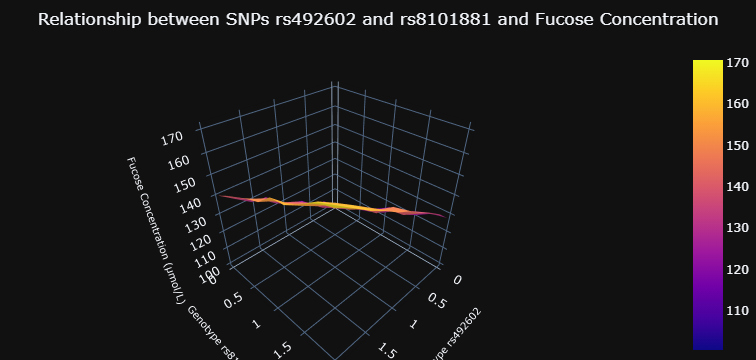

In [16]:
import plotly.graph_objects as go
import numpy as np

# Fictional data simulating values for two SNPs
snp_rs492602 = np.linspace(0, 2, 10)
snp_rs8101881 = np.linspace(0, 2, 10)
snp_rs492602, snp_rs8101881 = np.meshgrid(snp_rs492602, snp_rs8101881)

# Simulating Fucose concentration as a function of the two SNPs
concentracao_fucose = 100 + 20 * snp_rs492602 + 15 * snp_rs8101881 + np.random.normal(size=snp_rs492602.shape)

# Creating the 3D figure
fig = go.Figure(data=[go.Surface(z=concentracao_fucose, x=snp_rs492602, y=snp_rs8101881)])

# Updating the layout of the plot to prevent overlapping axis titles
fig.update_layout(
    title="Relationship between SNPs rs492602 and rs8101881 and Fucose Concentration",
    scene=dict(
        xaxis_title=dict(text="Genotype rs492602", font=dict(size=10)),
        yaxis_title=dict(text="Genotype rs8101881", font=dict(size=10)),
        zaxis_title=dict(text="Fucose Concentration (µmol/L)", font=dict(size=10)),
    ),
    margin=dict(l=0, r=0, b=0, t=50),  # Adjusting margins
    template="plotly_dark"
)

# Displaying the plot
fig.show()


## Reference

**Rueedi, R.**, Ledda, M., Nicholls, A. W., Salek, R. M., Marques-Vidal, P., Morya, E., Sameshima, K., Montoliu, I., Da Silva, L., Collino, S., Martin, F. P., Rezzi, S., Steinbeck, C., Waterworth, D. M., Waeber, G., Vollenweider, P., Beckmann, J. S., Le Coutre, J., Mooser, V., Bergmann, S., & Genick, U. K. (2014). Genome-wide association study of metabolic traits reveals novel gene-metabolite-disease links. PLoS Genetics, 10(2), e1004132. https://doi.org/10.1371/journal.pgen.1004132